In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, zoomed_inset_axes

In [2]:
precision=1e-3
gamma = 1
t_stop=10
t_start=-10
dt = precision / gamma
steps = int((t_stop - t_start) / dt)
tlist = np.linspace(t_start, t_stop, steps)

0.5163648658517394


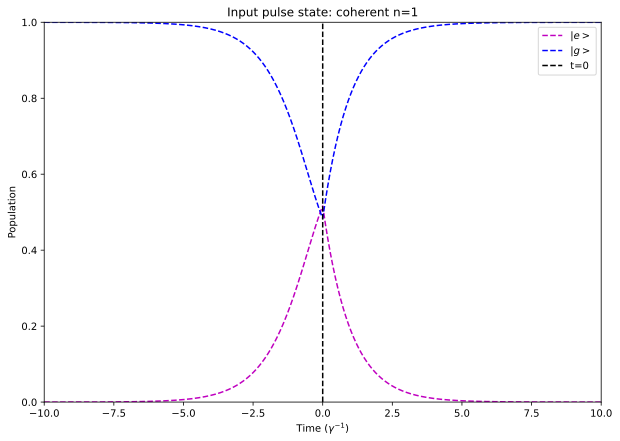

In [14]:
fig, axes = plt.subplots(figsize=(10,7))
#fig.set_figheight(7)
#fig.set_figwidth(10)
source_dir = "../../outputs/rising_exp/"

excited_atom = np.loadtxt(source_dir+"pop/coherent_1/precision_0.001/excited_atom.dat")
gs_atom = np.loadtxt(source_dir+"pop/coherent_1/precision_0.001/gs_atom.dat")

print(max(excited_atom))

axes.plot(tlist, excited_atom, '--m', label='$|e>$')
axes.plot(tlist, gs_atom, '--b', label='$|g>$')
axes.set_xlim(tlist[0],tlist[-1])
axes.set_xlabel('Time ($\gamma^{-1}$)')
axes.vlines(0,0,1,'k','dashed',label='t=0')

axes.set_ylim(0,1)
axes.set_ylabel('Population')
axes.set_title('Input pulse state: coherent n=1')
axes.legend()

plt.show()

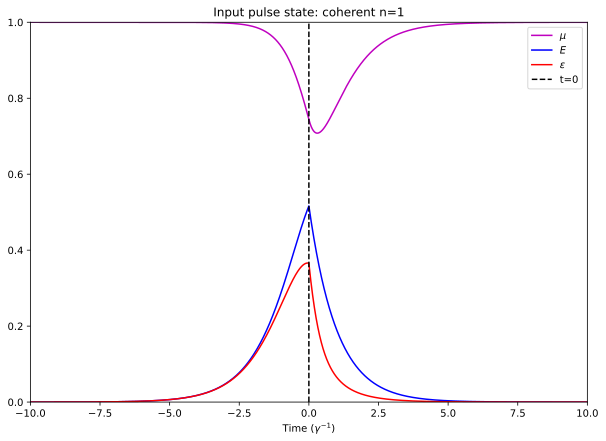

In [13]:
fig, axes = plt.subplots(figsize=(10,7))
source_dir = "../../outputs/rising_exp/"
 
pur = np.loadtxt(source_dir + "time/coherent_1/precision_0.001/purity.dat")
erg = np.loadtxt(source_dir +"time/coherent_1/precision_0.001/ergotropy.dat")
ene = np.loadtxt(source_dir +"time/coherent_1/precision_0.001/energy.dat")

axes.plot(pur[:,0], pur[:,1], '-m', label='$\mu$')
axes.plot(ene[:,0], ene[:,1], '-b', label='$E$')
axes.plot(erg[:,0], erg[:,1], '-r', label='$\epsilon$')
axes.vlines(0,0,1,'k','dashed',label='t=0')

axes.set_xlim(erg[:,0][0],erg[:,0][-1])
axes.set_ylim(0,1)

axes.set_xlabel('Time ($\gamma^{-1}$)')
axes.set_title('Input pulse state: coherent n=1')
axes.legend()

plt.show()

In [7]:
def mean_power(_ef, _tf, _ei=0., _ti=0.):
    """
    Return the ratio (_ef-_ei)/(_tf-_ti), which is the mean power
    """
    de = float(_ef - _ei)
    dt = float(_tf - _ti)
    if de == 0:
        return 0
    else:
        return de / dt

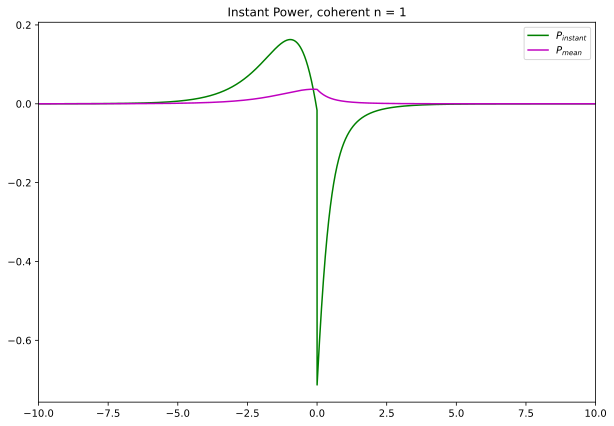

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
#fig.set_figheight(7)
#fig.set_figwidth(10)
source_dir = "../../outputs/rising_exp/"

erg = np.loadtxt(source_dir+"time/coherent_1/precision_0.001/ergotropy.dat")

mean_pow = [mean_power(ef,tf,erg[:,1][0],erg[:,0][0]) for ef,tf in zip(erg[:,1],erg[:,0])]
# Calculate the numerical derivative
# np.gradient uses the central slope, so it is more precise
dt = erg[:,0][-1] - erg[:,0][-2]
instant_pow = np.gradient(erg[:,1], dt)

ax.plot(tlist, instant_pow, '-g', label='$P_{instant}$')
ax.plot(tlist, mean_pow, '-m', label='$P_{mean}$')
ax.set_xlim(tlist[0], tlist[-1])
#ax.set_ylim(0)
axes.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_title('Instant Power, coherent n = 1')
ax.legend()

plt.show()